### Question 1

1. Given the data in ‘FB_20141126.mat’, perform data analysis on it. Your description should include the following points:
    - Midprice
    - Microprice
    - Spread
    - Volume Imbalance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as sio

In [2]:
data = sio.loadmat('data/FB_20141126')
LOB = data['LOB']
t = ((np.array((LOB['EventTime'][0][0][:,0])) - 3600000*9.5)*1e-3)
bid = np.array(LOB['BuyPrice'][0][0][:,0]*1e-4)
ask = np.array(LOB['SellPrice'][0][0][:,0]*1e-4)
askVolume = np.array(LOB['SellVolume'][0][0][:,0])
bidVolume = np.array(LOB['BuyVolume'][0][0][:,0])
a = [bid, ask, askVolume, bidVolume]
columns = ['bid', 'ask', 'askVolume', 'bidVolume']

In [3]:
# Composition of the pandas data frame

DATA = pd.DataFrame(
    data = np.transpose(a),
    index = t,
    columns = columns)
DATA['mid'] = (DATA['bid'] + DATA['ask'])/2
DATA['spread'] = DATA['ask'] - DATA['bid']
DATA['microprice'] = (DATA['ask']*DATA['bidVolume'] + DATA['bid']*DATA['askVolume'])/(DATA['askVolume'] + DATA['bidVolume'])
DATA['imbalance'] = (DATA['askVolume'] - DATA['bidVolume'])/(DATA['askVolume'] + DATA['bidVolume'])
DATA

,bid,ask,askVolume,bidVolume,mid,spread,microprice,imbalance
0.1,75.47,75.50,105.0,1600.0,75.485,0.03,75.498152,-0.876833
0.2,75.47,75.50,105.0,1600.0,75.485,0.03,75.498152,-0.876833
0.3,75.50,75.51,100.0,500.0,75.505,0.01,75.508333,-0.666667
0.4,75.51,75.53,1000.0,100.0,75.520,0.02,75.511818,0.818182
0.5,75.51,75.53,1000.0,100.0,75.520,0.02,75.511818,0.818182
...,...,...,...,...,...,...,...,...
23399.6,77.63,77.64,9800.0,5148.0,77.635,0.01,77.633444,0.311212
23399.7,77.63,77.64,9800.0,5148.0,77.635,0.01,77.633444,0.311212
23399.8,77.63,77.64,12600.0,5148.0,77.635,0.01,77.632901,0.419878
23399.9,77.63,77.64,12600.0,5148.0,77.635,0.01,77.632901,0.419878


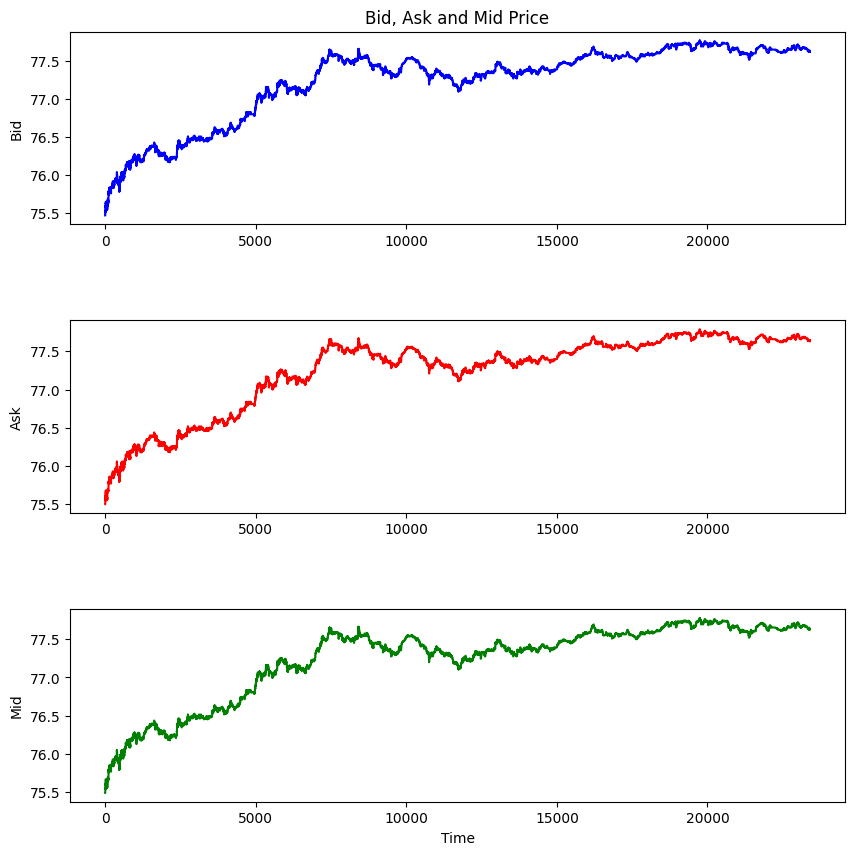

In [4]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

# Plot bid
ax[0].plot(DATA.index, DATA['bid'], color='blue')
ax[0].set_ylabel('Bid')
ax[0].set_title('Bid, Ask and Mid Price')

# Plot ask
ax[1].plot(DATA.index, DATA['ask'], color='red')
ax[1].set_ylabel('Ask')

# Plot mid
ax[2].plot(DATA.index, DATA['mid'], color='green')
ax[2].set_ylabel('Mid')

# Set x-axis label
ax[2].set_xlabel('Time')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()



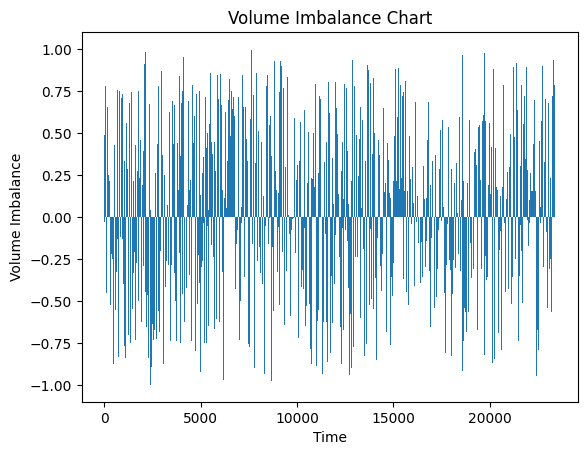

In [6]:
plt.bar(DATA.index, DATA['imbalance'])
plt.xlabel('Time')
plt.ylabel('Volume Imbalance')
plt.title('Volume Imbalance Chart')
plt.show()
